In [1]:
#Import Essential Libraries
import sweetviz
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tpot
from sklearn.preprocessing import OneHotEncoder
import shap
import matplotlib.pyplot as plt
import matplotlib

In [2]:
file="all.csv"
df=pd.read_csv(file)
df
# new=df.head(14)
# new

,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,台中,物價波動,最高法院,物價,NaN
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,台北,物價波動,高等法院,否,NaN
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,最高法院 113 年度台上字第 360 號民事判決,是,是,台中,人為因素,最高法院,否,NaN
...,...,...,...,...,...,...,...,...
215,臺灣嘉義地方法院 108 年度建字第 19 號民事判決,是,是,嘉義,地質因素,地方法院,變更設計,巨額採購
216,臺灣嘉義地方法院 112 年度建字第 6 號民事判決,是,是,嘉義,物價波動,地方法院,物價,查核金額
217,臺灣嘉義地方法院 111 年度訴字第 96 號民事判決,否,否,嘉義,物價波動,地方法院,物價,NaN
218,臺灣高等法院 108 年度重上字第 1011 號民事判決,否,否,台北,物價波動,高等法院,物價,NaN


In [3]:
condition=df.isnull().any(axis='columns')
df[condition]

,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,台中,物價波動,最高法院,物價,NaN
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,台北,物價波動,高等法院,否,NaN
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,最高法院 113 年度台上字第 360 號民事判決,是,是,台中,人為因素,最高法院,否,NaN
...,...,...,...,...,...,...,...,...
212,臺灣高等法院臺南分院民事判決 111年度建上字第28號,否,否,嘉義,物價波動,高等法院,物價,NaN
214,臺灣臺中地方法院 111 年度建字第 79 號民事判決,是,否,台中,物價波動,地方法院,物價,NaN
217,臺灣嘉義地方法院 111 年度訴字第 96 號民事判決,否,否,嘉義,物價波動,地方法院,物價,NaN
218,臺灣高等法院 108 年度重上字第 1011 號民事判決,否,否,台北,物價波動,高等法院,物價,NaN


In [3]:
df['公共工程金額類型'].fillna(value='無', inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_22476\2167111492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['公共工程金額類型'].fillna(value='無', inplace=True)


,判決字號,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,最高法院 106 年度台上字第 4 號,是,否,台中,物價波動,最高法院,物價,無
1,臺灣高等法院 99 年度建上更(一)字第 24 號民事判決,否,否,台北,物價波動,高等法院,否,無
2,臺灣高等法院 107 年度建上字第 2 號民事判決,否,否,基隆,物價波動,高等法院,否,無
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,無
4,最高法院 113 年度台上字第 360 號民事判決,是,是,台中,人為因素,最高法院,否,無
...,...,...,...,...,...,...,...,...
215,臺灣嘉義地方法院 108 年度建字第 19 號民事判決,是,是,嘉義,地質因素,地方法院,變更設計,巨額採購
216,臺灣嘉義地方法院 112 年度建字第 6 號民事判決,是,是,嘉義,物價波動,地方法院,物價,查核金額
217,臺灣嘉義地方法院 111 年度訴字第 96 號民事判決,否,否,嘉義,物價波動,地方法院,物價,無
218,臺灣高等法院 108 年度重上字第 1011 號民事判決,否,否,台北,物價波動,高等法院,物價,無


In [4]:
df = df.dropna()
missing_values_count = df.isnull().sum()

missing_values_sorted = missing_values_count.sort_values(ascending=False)

total_cells = len(df)
missing_percentage = (missing_values_sorted / total_cells) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values_sorted,
                             'Percentage (%)': missing_percentage})

print(missing_data)

          Missing Values  Percentage (%)
判決字號                   0             0.0
情事變更適用                 0             0.0
是否為公共工程                0             0.0
施工地點                   0             0.0
情事變更的原因                0             0.0
審級                     0             0.0
約款類型                   0             0.0
公共工程金額類型               0             0.0


In [5]:
df.drop(columns=['判決字號'], inplace=True)
df

C:\Users\USER\AppData\Local\Temp\ipykernel_22476\2395517855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['判決字號'], inplace=True)


,情事變更適用,是否為公共工程,施工地點,情事變更的原因,審級,約款類型,公共工程金額類型
0,是,否,台中,物價波動,最高法院,物價,無
1,否,否,台北,物價波動,高等法院,否,無
2,否,否,基隆,物價波動,高等法院,否,無
4,是,是,台中,人為因素,最高法院,否,無
5,是,是,新北,地質因素,高等法院,否,查核金額
...,...,...,...,...,...,...,...
215,是,是,嘉義,地質因素,地方法院,變更設計,巨額採購
216,是,是,嘉義,物價波動,地方法院,物價,查核金額
217,否,否,嘉義,物價波動,地方法院,物價,無
218,否,否,台北,物價波動,高等法院,物價,無


In [7]:
# df.at[14, '約款類型'] = '物價'
# df.at[13, '情事變更的原因'] = '展延'
# df

In [6]:
nominal_columns = [
    '是否為公共工程',
    '施工地點',
    '情事變更的原因',
    '審級',
    '約款類型',
    '公共工程金額類型'
]

In [7]:
data = pd.get_dummies(df, columns=nominal_columns)
data

,情事變更適用,是否為公共工程_否,是否為公共工程_是,施工地點_南投,施工地點_台中,施工地點_台北,施工地點_台南,施工地點_台東,施工地點_嘉義,施工地點_基隆,...,約款類型_工期約定,約款類型_漏項,約款類型_物價,約款類型_變更設計,公共工程金額類型_公告金額,公共工程金額類型_巨額埰購,公共工程金額類型_巨額採購,公共工程金額類型_巨額踩購,公共工程金額類型_查核金額,公共工程金額類型_無
0,是,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,否,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,否,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,是,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,是,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,是,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
216,是,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
217,否,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
218,否,True,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [8]:
# data.at[14, '約款類型_變更設計'] = True
# data.at[13, '情事變更的原因_物價波動'] = True
# data

In [9]:
data['情事變更適用'].value_counts()

情事變更適用
是    49
否    46
Name: count, dtype: int64

In [10]:
data['情事變更適用'] = data['情事變更適用'].map({'是': 1, '否': 0})

In [11]:
y = data["情事變更適用"]
x = data.drop("情事變更適用", axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.9210526315789473
0.7368421052631579


In [15]:
param_grid = {
    'max_depth': [5, 10, 15],  
    'min_samples_leaf': [1, 3, 5]  
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1_weighted', verbose=2)

In [16]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=3; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ....................max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ...................max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...................max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END ...................max_depth=10, min_sam

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 3, 5]},
             scoring='f1_weighted', verbose=2)

In [17]:
best_rf = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5}

In [18]:
rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=5,         
    min_samples_leaf=5,     
    random_state=42      
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [19]:
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_test, y_test))

0.6578947368421053
0.8421052631578947


In [23]:
feature_importances = rf_model.feature_importances_
for i in range(len(feature_importances)):
    print(x_train.columns[i],feature_importances[i])

是否為公共工程_否 0.018622010020409946
是否為公共工程_是 0.03913859462711804
施工地點_南投 0.0
施工地點_台中 0.030456084263950082
施工地點_台北 0.032900409155528054
施工地點_台南 0.0
施工地點_台東 0.0
施工地點_嘉義 0.0
施工地點_基隆 0.0
施工地點_屏東 0.0
施工地點_彰化 0.002573394045245526
施工地點_新北 0.006920728317596817
施工地點_新竹 0.0
施工地點_桃園 0.0
施工地點_臺中 0.0
施工地點_臺北 0.0
施工地點_花蓮 0.0
施工地點_高雄 0.018796114771682065
情事變更的原因_人為因素 0.0
情事變更的原因_原告未主張 0.0
情事變更的原因_地質因素 0.0
情事變更的原因_天災或自然災害 0.08815470366926877
情事變更的原因_工期展延 0.007580766323966387
情事變更的原因_漏項 0.0
情事變更的原因_物價波動 0.10538870156101757
情事變更的原因_變更設計 0.0
審級_地方法院 0.034495741030942946
審級_最高法院 0.14809229628522041
審級_高等法院 0.1198101173961825
約款類型_否 0.0068385658296410525
約款類型_天候或自然災害 0.0
約款類型_工期約定 0.0009332252599289891
約款類型_漏項 0.0
約款類型_物價 0.07242675142233841
約款類型_變更設計 0.14526908066071512
公共工程金額類型_公告金額 0.020529841373137712
公共工程金額類型_巨額埰購 0.0
公共工程金額類型_巨額採購 0.01783198964080004
公共工程金額類型_巨額踩購 0.0
公共工程金額類型_查核金額 0.03575563720353243
公共工程金額類型_無 0.04748524714177729


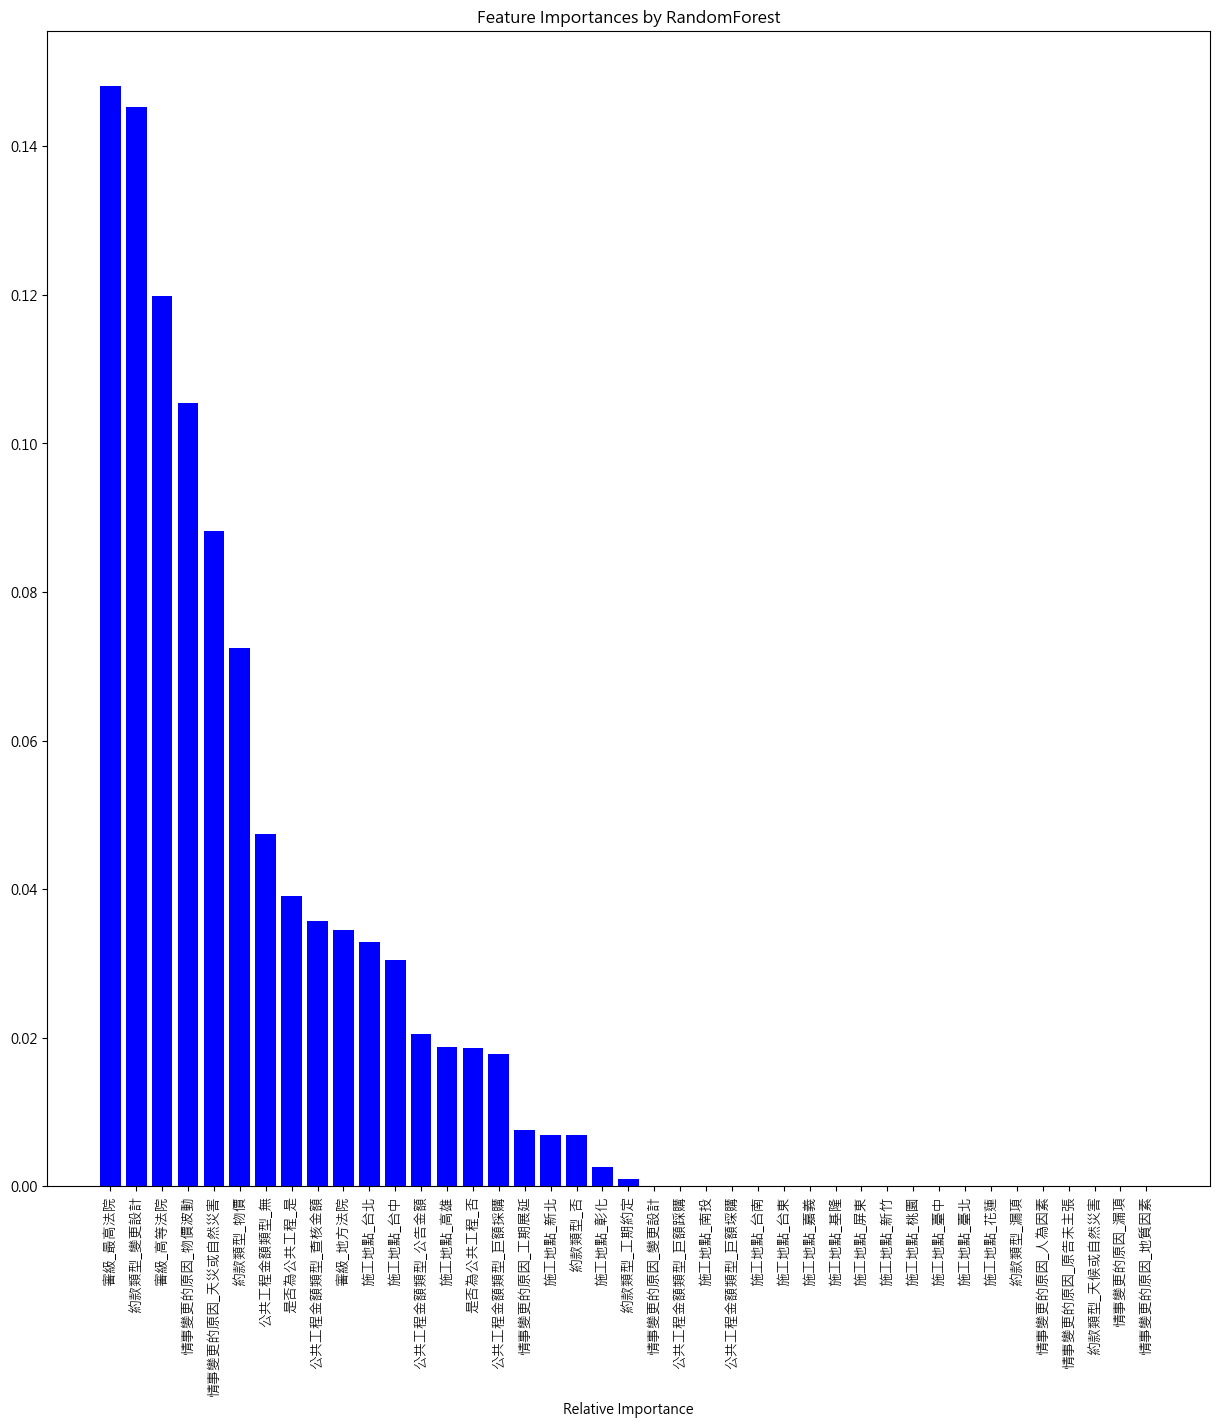

In [24]:
features = x_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  

sorted_features = pd.DataFrame({'Features': features[indices], 'Importance': importances[indices]})
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 15))
plt.title('Feature Importances by RandomForest')
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90) #x軸座標文字轉45度
plt.xlabel('Relative Importance')
# plt.rcParams["font.sans-serif"]="Microsoft JhengHei"
# plt.rcParams["axes.unicode_minus"]=False
plt.show()

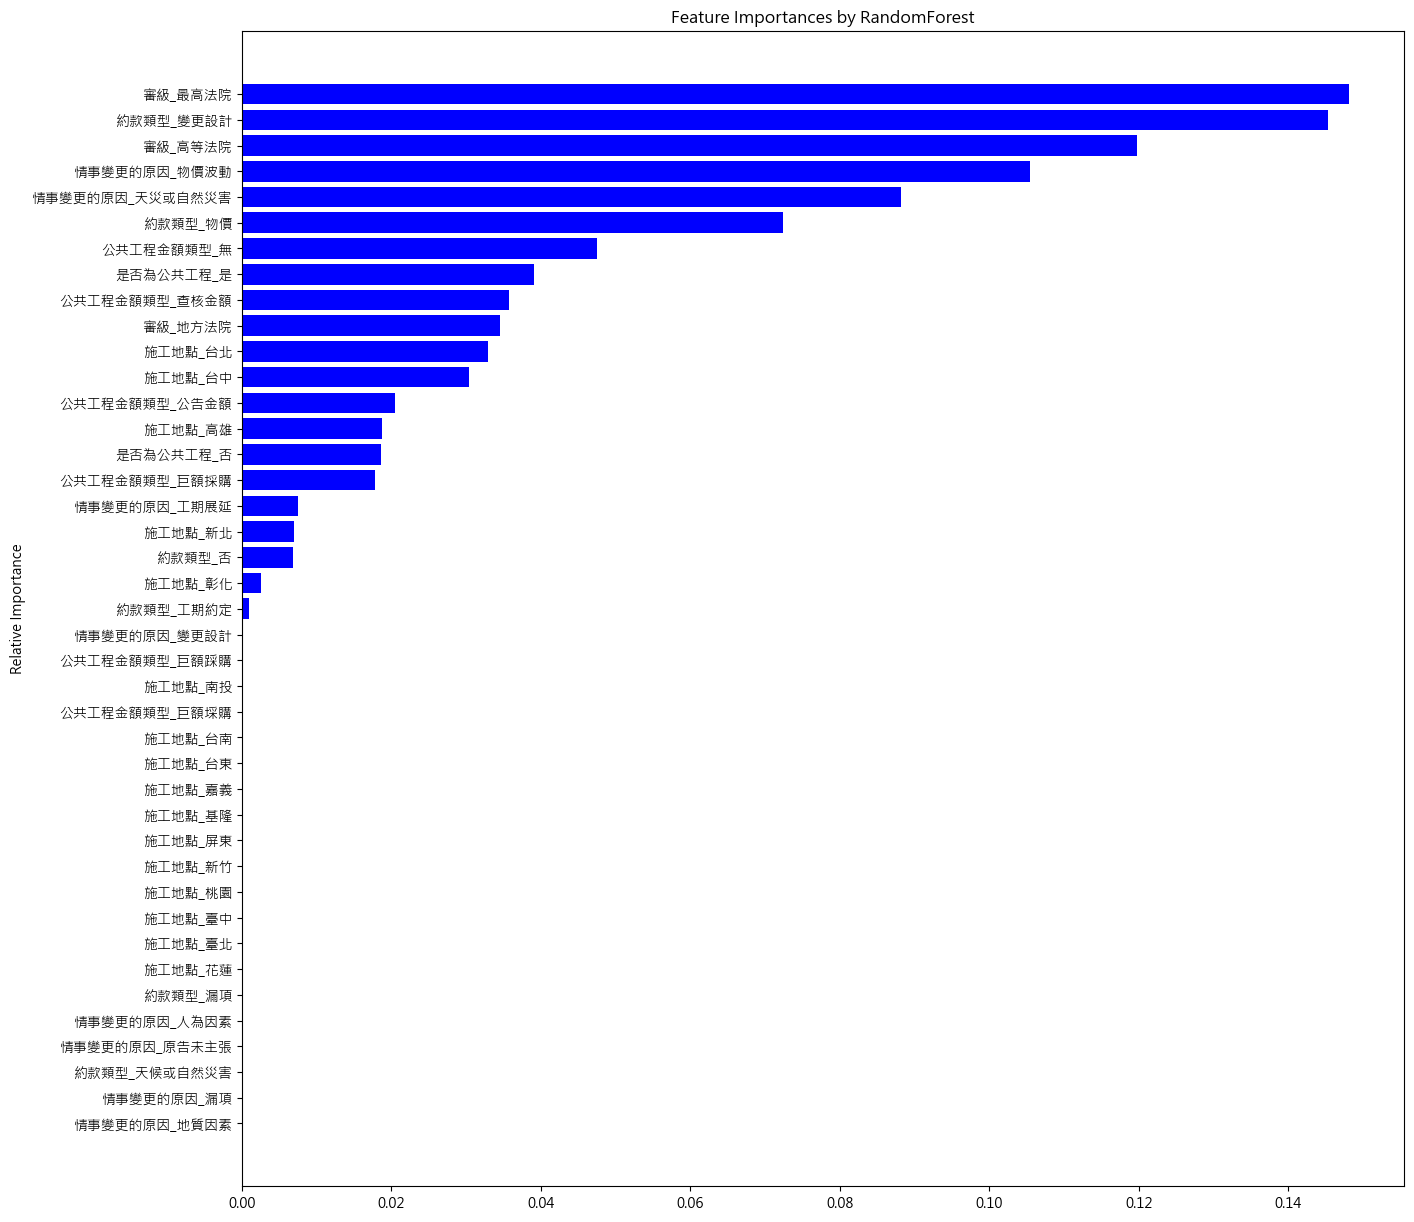

In [22]:
features = x_train.columns
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]  

sorted_features = pd.DataFrame({'Features': features[indices], 'Importance': importances[indices]})
matplotlib.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(15, 15))
plt.title('Feature Importances by RandomForest')
plt.barh(range(len(importances)), importances[indices], color='b', align='center')
plt.yticks(range(len(importances)), features[indices],)
plt.ylabel('Relative Importance')
plt.gca().invert_yaxis()  # 反轉y 軸，使重要性高的在上面
plt.show()

In [25]:
sweetviz.analyze(pd.concat([x_train, y_train], axis=1)).show_html("selected.html")

                                             |          | [  0%]   00:00 -> (? left)

c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 21542 (\N{CJK UNIFIED IDEOGRAPH-5426}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 28858 (\N{CJK UNIFIED IDEOGRAPH-70BA}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 20844 (\N{CJK UNIFIED IDEOGRAPH-516C}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\USER\anaconda3\envs\pytorch\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 2084

Report selected.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
explainer = shap.Explainer(rf_model)

shap_values = explainer.shap_values(x_train)


0


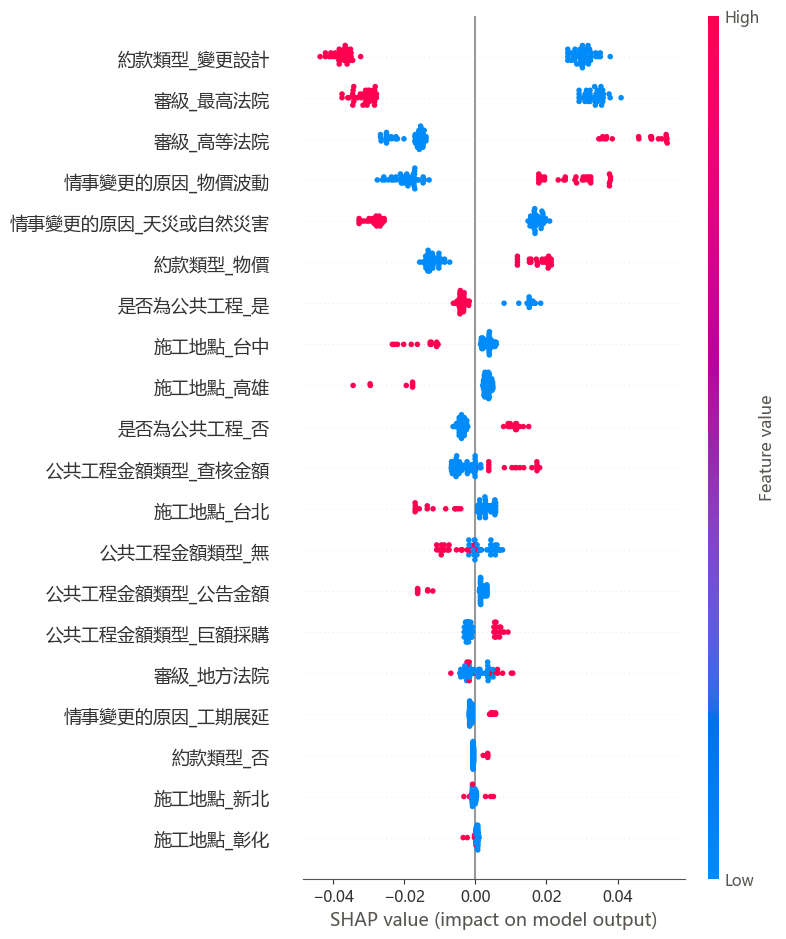

1


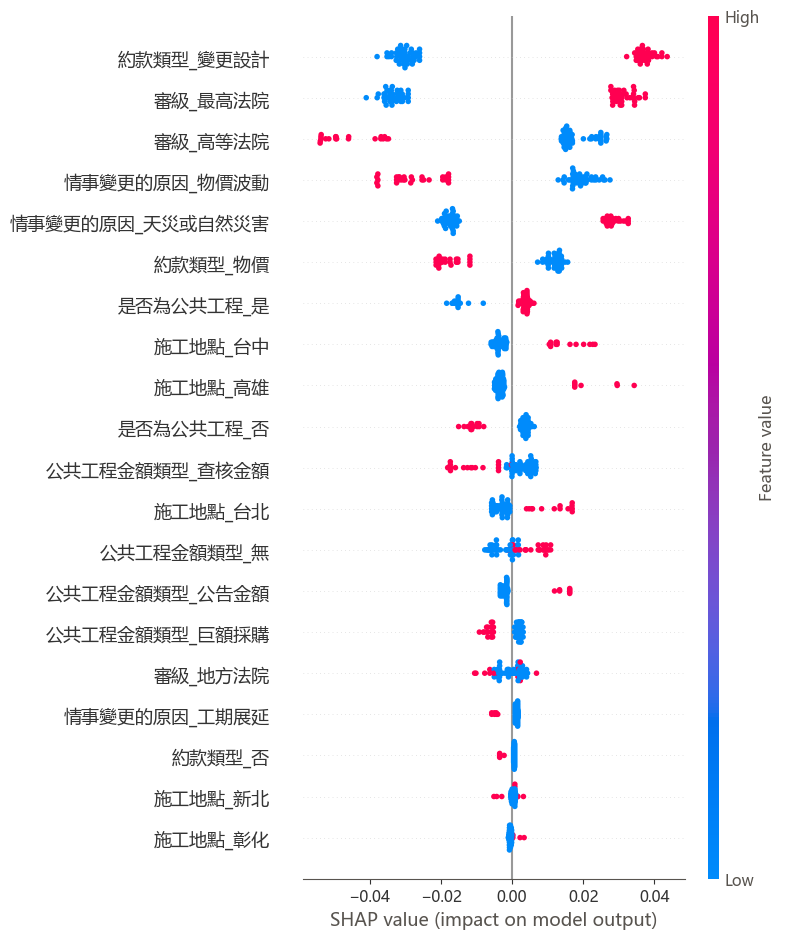

In [34]:
matplotlib.rc('font', family='Microsoft YaHei')
result_dict = {'有': 1, '無': 0}
class_names=rf_model.classes_
for i in range(2):
    print(class_names[i])
    shap.summary_plot(shap_values[:, :, i], x_train, feature_names=x_train.columns)